# Bank Marketing Dataset

## Project Phase 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import warnings 
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
import seaborn as sns
from numpy import sin
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df = pd.read_csv('bank_additional_full.csv', delimiter= ';')
df = df.drop(['previous'], axis=1)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.describe()

,age,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Data Cleaning Methods

#### 1. Labelling the values to numeric

Here we are changing the categorical data to numeric

In [5]:
df['pdays'].unique()
df['default'].unique()
df['default']=df['default'].replace(['yes','no','unknown'],[1,2,3])
df['job'] = df['job'].replace(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], [1,2,3,4,5,6,7,8,9,10,11,12])
df['education'] = df['education'].replace(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], [1,2,3,4,5,6,7,8])
df['housing'] = df['housing'].replace(['no', 'yes', 'unknown'], [1,2,3])
df['loan'] = df['loan'].replace(['no', 'yes', 'unknown'], [1,2,3])
df['marital'] = df['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1,2,3,4])
df['poutcome'] = df['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3])
df['month'].unique()
df['month'] = df['month'].replace(['jan','feb','mar', 'apr','may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec' ], [1,2,3,4,5,6,7,8,9,10,11,12])
df['day_of_week'].unique()
df['day_of_week'] = df['day_of_week'].replace(['mon', 'tue', 'wed', 'thu', 'fri'], [1,2,3,4,5])
df['contact'].unique()
df['contact'] = df['contact'].replace(['telephone', 'cellular'], [1,2])
df['y'].unique()
df['y'] = df['y'].replace(['no', 'yes'], [0,1])

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,1,1,2,1,1,1,5,1,261,1,999,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2,1,2,3,1,1,1,5,1,149,1,999,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2,1,2,2,2,1,1,5,1,226,1,999,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,3,1,3,2,1,1,1,5,1,151,1,999,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,2,1,2,2,1,2,1,5,1,307,1,999,1,1.1,93.994,-36.4,4.857,5191.0,0


#### 2.Dropping Unnecessary columns with single values

We removed the column ‘pdays’ which is having single values in the column.

In [6]:
df = df.drop(['pdays'],axis = 1)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,1,1,2,1,1,1,5,1,261,1,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2,1,2,3,1,1,1,5,1,149,1,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2,1,2,2,2,1,1,5,1,226,1,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,3,1,3,2,1,1,1,5,1,151,1,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,2,1,2,2,1,2,1,5,1,307,1,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,5,2,2,1,2,11,5,334,1,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,4,1,5,2,1,1,2,11,5,383,1,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,6,1,7,2,2,1,2,11,5,189,2,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,5,1,5,2,1,1,2,11,5,442,1,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

#### 3.Replace null values if there are any

Checking the null values in the data and replacing those with mode values of the respective column.

In [8]:
col_names = ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact','month', 'day_of_week', 'duration', 'campaign', 'emp.var.rate',
             'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
for col in col_names:
    mode_value = df[col].mode().values
    df[col].fillna(mode_value[0], inplace = True)

In [9]:
df.isna().sum() #checking null values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

This cell is to create a dataframe copy of DF for visualization.

In [10]:
col_name = ['cons.price.idx']
for col in col_name:
    mode_value = df[col].mode().values
    df[col].fillna(mode_value[0], inplace = True)

def scaler_from_0to1(series):
     return (series - series.min()) / (series.max() - series.min())

for col in col_name:
    df[col] = scaler_from_0to1(df[col])
df1 = df.copy(deep = True)

#### 4. Rescale dataset columns to the range from 0 to 1

We used Min Max normalization scaling to standardize the range of independent variables

In [11]:
def scaler_from_0to1(series):
     return (series - series.min()) / (series.max() - series.min())

In [12]:
for col in col_names:
    df1[col] = scaler_from_0to1(df1[col])
    
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,0.000000,0.0,0.000000,2,0.0,0.0,0.0,0.222222,0.0,0.053070,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.493827,0.090909,0.0,0.142857,3,0.0,0.0,0.0,0.222222,0.0,0.030297,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.246914,0.090909,0.0,0.142857,2,0.5,0.0,0.0,0.222222,0.0,0.045954,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.283951,0.181818,0.0,0.285714,2,0.0,0.0,0.0,0.222222,0.0,0.030704,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.481481,0.090909,0.0,0.142857,2,0.0,0.5,0.0,0.222222,0.0,0.062424,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


#### 5. Finding correlation to find the dependencies and remove over headed columns

Used the correlation function to check the Dependencies and remove the columns which are over headed. Dropped columns are [‘euribor3m’,’ nr.employed’,’ emp.var.rate’]. 

In [13]:
cormat = df.corr()
round(cormat,2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.00,0.03,-0.11,-0.09,0.16,-0.00,-0.01,-0.01,0.08,-0.02,-0.00,0.00,0.03,-0.00,0.00,0.13,0.01,-0.02,0.03
job,0.03,1.00,-0.01,0.16,-0.01,0.01,-0.00,0.02,0.06,-0.00,0.01,-0.02,0.05,-0.08,-0.05,0.02,-0.07,-0.08,0.05
marital,-0.11,-0.01,1.00,0.06,-0.10,0.01,0.00,0.04,-0.00,-0.00,0.00,0.00,0.03,-0.05,-0.02,-0.05,-0.05,-0.05,0.03
education,-0.09,0.16,0.06,1.00,-0.14,0.01,0.00,0.10,0.12,0.01,-0.01,-0.00,0.03,-0.03,-0.08,0.07,-0.02,-0.03,0.05
default,0.16,-0.01,-0.10,-0.14,1.00,-0.01,0.00,-0.14,-0.08,-0.00,-0.01,0.03,-0.11,0.20,0.17,0.03,0.20,0.19,-0.10
housing,-0.00,0.01,0.01,0.01,-0.01,1.00,0.29,0.07,0.02,-0.01,-0.01,-0.01,0.02,-0.05,-0.07,-0.03,-0.05,-0.04,0.01
loan,-0.01,-0.00,0.00,0.00,0.00,0.29,1.00,-0.00,-0.01,0.00,-0.00,0.00,-0.00,0.00,0.01,-0.01,0.00,0.00,-0.01
contact,-0.01,0.02,0.04,0.10,-0.14,0.07,-0.00,1.00,0.32,-0.02,0.03,-0.08,0.23,-0.39,-0.59,-0.25,-0.40,-0.27,0.14
month,0.08,0.06,-0.00,0.12,-0.08,0.02,-0.01,0.32,1.00,-0.01,-0.02,-0.03,0.06,0.06,-0.15,0.26,0.16,0.13,0.04
day_of_week,-0.02,-0.00,-0.00,0.01,-0.00,-0.01,0.00,-0.02,-0.01,1.00,0.01,0.02,0.00,-0.00,-0.00,-0.00,-0.01,-0.00,0.01


In [14]:
df = df.drop(['euribor3m'],axis = 1)
df = df.drop(['nr.employed'],axis = 1)
df = df.drop(['emp.var.rate'],axis = 1)

In [15]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons.price.idx,cons.conf.idx,y
0,56,1,1,1,2,1,1,1,5,1,261,1,1,0.698753,-36.4,0
1,57,2,1,2,3,1,1,1,5,1,149,1,1,0.698753,-36.4,0
2,37,2,1,2,2,2,1,1,5,1,226,1,1,0.698753,-36.4,0
3,40,3,1,3,2,1,1,1,5,1,151,1,1,0.698753,-36.4,0
4,56,2,1,2,2,1,2,1,5,1,307,1,1,0.698753,-36.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,5,2,2,1,2,11,5,334,1,1,1.000000,-50.8,1
41184,46,4,1,5,2,1,1,2,11,5,383,1,1,1.000000,-50.8,0
41185,56,6,1,7,2,2,1,2,11,5,189,2,1,1.000000,-50.8,0
41186,44,5,1,5,2,1,1,2,11,5,442,1,1,1.000000,-50.8,1


#### 6. Convert Normalized data's datatypes to float

Here converted the normalized data into float datatype which will be used for the machine learning algorithm efficiently.

In [16]:
string_datatype_cols=['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact','month', 'day_of_week', 'duration', 'campaign',
             'cons.price.idx', 'cons.conf.idx', 'y']
for col in string_datatype_cols:
    df[col] = df[col].astype('float',errors = 'raise')

In [17]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons.price.idx,cons.conf.idx,y
0,56.0,1.0,1.0,1.0,2,1.0,1.0,1.0,5.0,1.0,261.0,1.0,1,0.698753,-36.4,0.0
1,57.0,2.0,1.0,2.0,3,1.0,1.0,1.0,5.0,1.0,149.0,1.0,1,0.698753,-36.4,0.0
2,37.0,2.0,1.0,2.0,2,2.0,1.0,1.0,5.0,1.0,226.0,1.0,1,0.698753,-36.4,0.0
3,40.0,3.0,1.0,3.0,2,1.0,1.0,1.0,5.0,1.0,151.0,1.0,1,0.698753,-36.4,0.0
4,56.0,2.0,1.0,2.0,2,1.0,2.0,1.0,5.0,1.0,307.0,1.0,1,0.698753,-36.4,0.0


#### 7. Renaming the Fileds

Renaming the fields so that we can remove the unwanted characters in the column names.

In [18]:
df.columns = [c.replace('.', '_') for c in df.columns]
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons_price_idx,cons_conf_idx,y
0,56.0,1.0,1.0,1.0,2,1.0,1.0,1.0,5.0,1.0,261.0,1.0,1,0.698753,-36.4,0.0
1,57.0,2.0,1.0,2.0,3,1.0,1.0,1.0,5.0,1.0,149.0,1.0,1,0.698753,-36.4,0.0
2,37.0,2.0,1.0,2.0,2,2.0,1.0,1.0,5.0,1.0,226.0,1.0,1,0.698753,-36.4,0.0
3,40.0,3.0,1.0,3.0,2,1.0,1.0,1.0,5.0,1.0,151.0,1.0,1,0.698753,-36.4,0.0
4,56.0,2.0,1.0,2.0,2,1.0,2.0,1.0,5.0,1.0,307.0,1.0,1,0.698753,-36.4,0.0


#### 8. Remove rows who's age is less than 20

From the real world scenarios people who’s age less than 20 will not have any loan as they will not have any source of income to apply for a loan.
So removing the columns whose age is less than 20.

In [19]:
age_20=df[df['age']<20]
print(age_20.count())

age               75
job               75
marital           75
education         75
default           75
housing           75
loan              75
contact           75
month             75
day_of_week       75
duration          75
campaign          75
poutcome          75
cons_price_idx    75
cons_conf_idx     75
y                 75
dtype: int64


In [20]:
for x in df.index:
    if df.loc[x, 'age'] < 20:
        df.drop(x, inplace = True)

In [21]:
age_20=df[df['age']<20]
print(age_20.count())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
poutcome          0
cons_price_idx    0
cons_conf_idx     0
y                 0
dtype: int64


#### 9.Removing records with Duplicate Data

Removed the duplicated data so which helps in the improve the data.

In [22]:
df.duplicated().sum()

13

In [23]:
df = df.drop_duplicates(keep='first')

In [24]:
df.duplicated().sum()

0

#### 10. Remove columns that has low variance

By removing the columns that has low variance will be more efficient to train the model.

In [25]:
from sklearn.feature_selection import VarianceThreshold

transform = VarianceThreshold()
# transform the input data
X_sel = transform.fit_transform(df)
print('X_Sel shape: ',X_sel.shape,'\n')

#print(df.isna().sum())

df.head()

X_Sel shape:  (41100, 16) 



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons_price_idx,cons_conf_idx,y
0,56.0,1.0,1.0,1.0,2,1.0,1.0,1.0,5.0,1.0,261.0,1.0,1,0.698753,-36.4,0.0
1,57.0,2.0,1.0,2.0,3,1.0,1.0,1.0,5.0,1.0,149.0,1.0,1,0.698753,-36.4,0.0
2,37.0,2.0,1.0,2.0,2,2.0,1.0,1.0,5.0,1.0,226.0,1.0,1,0.698753,-36.4,0.0
3,40.0,3.0,1.0,3.0,2,1.0,1.0,1.0,5.0,1.0,151.0,1.0,1,0.698753,-36.4,0.0
4,56.0,2.0,1.0,2.0,2,1.0,2.0,1.0,5.0,1.0,307.0,1.0,1,0.698753,-36.4,0.0


After using the Cleanig methods the data format is :

In [26]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons_price_idx,cons_conf_idx,y
0,56.0,1.0,1.0,1.0,2,1.0,1.0,1.0,5.0,1.0,261.0,1.0,1,0.698753,-36.4,0.0
1,57.0,2.0,1.0,2.0,3,1.0,1.0,1.0,5.0,1.0,149.0,1.0,1,0.698753,-36.4,0.0
2,37.0,2.0,1.0,2.0,2,2.0,1.0,1.0,5.0,1.0,226.0,1.0,1,0.698753,-36.4,0.0
3,40.0,3.0,1.0,3.0,2,1.0,1.0,1.0,5.0,1.0,151.0,1.0,1,0.698753,-36.4,0.0
4,56.0,2.0,1.0,2.0,2,1.0,2.0,1.0,5.0,1.0,307.0,1.0,1,0.698753,-36.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,6.0,1.0,5.0,2,2.0,1.0,2.0,11.0,5.0,334.0,1.0,1,1.000000,-50.8,1.0
41184,46.0,4.0,1.0,5.0,2,1.0,1.0,2.0,11.0,5.0,383.0,1.0,1,1.000000,-50.8,0.0
41185,56.0,6.0,1.0,7.0,2,2.0,1.0,2.0,11.0,5.0,189.0,2.0,1,1.000000,-50.8,0.0
41186,44.0,5.0,1.0,5.0,2,1.0,1.0,2.0,11.0,5.0,442.0,1.0,1,1.000000,-50.8,1.0


In [27]:
df.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,cons_price_idx,cons_conf_idx,y
count,41100.000000,41100.000000,41100.000000,41100.000000,41100.000000,41100.000000,41100.000000,41100.000000,41100.000000,41100.000000,41100.000000,41100.000000,41100.000000,41100.000000,41100.000000,41100.000000
mean,40.063187,4.660511,1.509757,4.277421,2.209002,1.571606,1.199708,1.634282,6.607348,2.979903,258.242044,2.569100,1.169002,0.536062,-40.503742,0.112044
std,10.389552,2.436553,0.697119,2.186308,0.406781,0.541166,0.455862,0.481637,2.039510,1.411418,259.366246,2.772284,0.454293,0.225365,4.621386,0.315424
min,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000,0.000000,-50.800000,0.000000
25%,32.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,5.000000,2.000000,102.000000,1.000000,1.000000,0.340608,-42.700000,0.000000
50%,38.000000,4.000000,1.000000,4.000000,2.000000,2.000000,1.000000,2.000000,6.000000,3.000000,179.000000,2.000000,1.000000,0.603274,-41.800000,0.000000
75%,47.000000,5.000000,2.000000,7.000000,2.000000,2.000000,1.000000,2.000000,8.000000,4.000000,319.000000,3.000000,1.000000,0.698753,-36.400000,0.000000
max,98.000000,12.000000,4.000000,8.000000,3.000000,3.000000,3.000000,2.000000,12.000000,5.000000,4918.000000,56.000000,3.000000,1.000000,-26.900000,1.000000


### EDA, Data Visualization

#### 1. Plot on distribution on Education

Result: the graph shows that the data has more candidates with University Degree followed by high-school

<AxesSubplot:xlabel='education'>

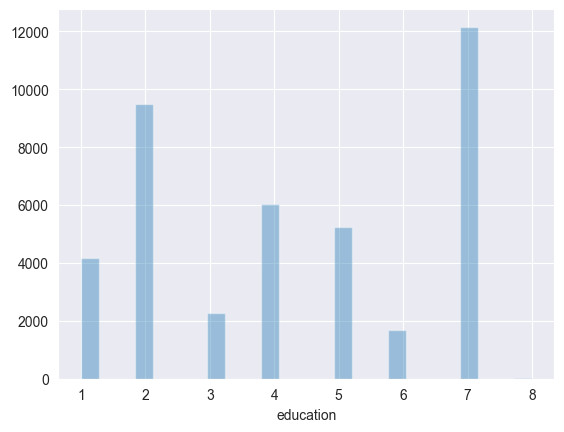

In [28]:
for col in df.columns:
    df[col] = df[col].astype('float',errors = 'raise')
sns.distplot( df['education'], kde=False)

#### 2. Catplot 

cons.price.idx: The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods.
Poutcome: outcome of the previous marketing campaign (categorical:'failure','nonexistent','success')

Plot on how rise in CPI impacts outcome of the phone based direct marketing campaign outcomes

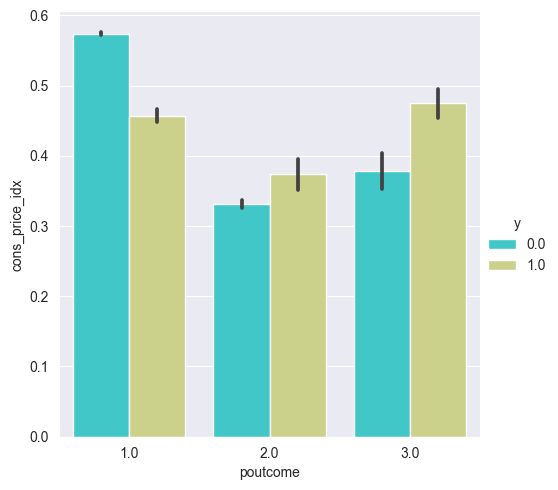

In [29]:
sns.catplot(x="poutcome", y="cons_price_idx", hue="y", kind = 'bar',data=df, palette = "rainbow")

Based on Age of an individual and their educational background, the plot shows whether if the contact has a personal loan

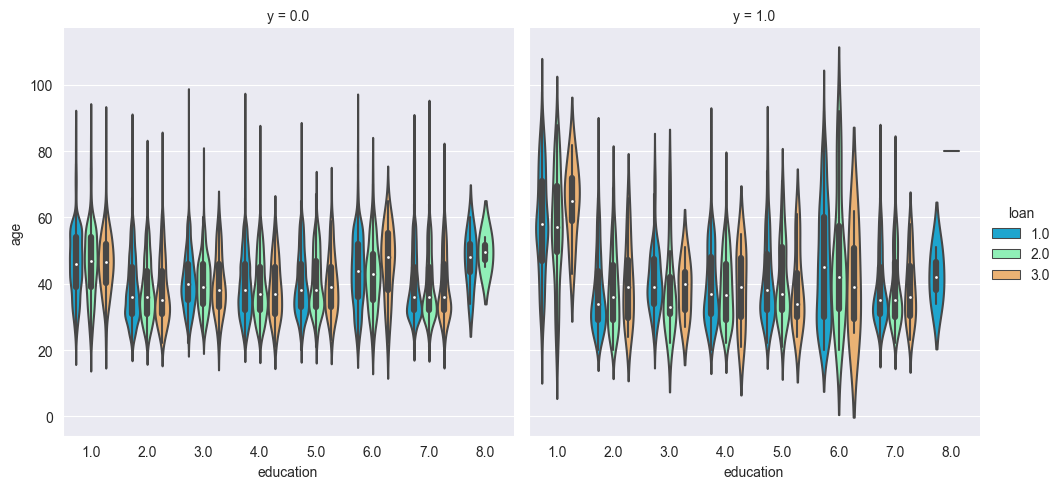

In [30]:
sns.catplot(x="education", y="age", hue="loan",col="y", kind = 'violin',data=df, palette = "rainbow")

#### 3. Violinplot

The following graph show cases the impact on output based on the call duration on each campaign phone call.

<AxesSubplot:title={'center':'Violinplot'}, xlabel='y', ylabel='duration'>

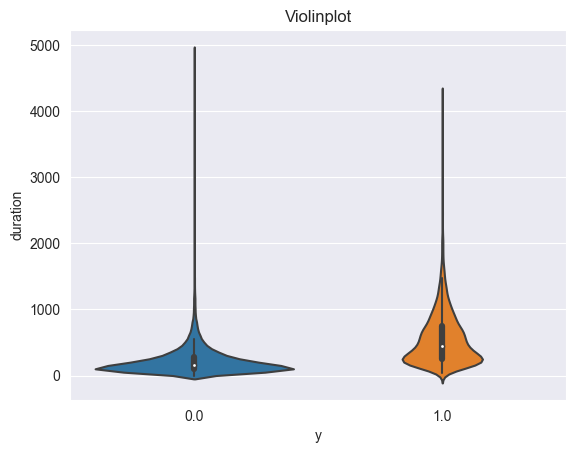

In [31]:
plt.title('Violinplot')
sns.violinplot(x='y', y='duration',data=df)

This consumer confidence indicator provides an indication of future developments of households' consumption and saving, based upon answers regarding their expected financial situation, their sentiment about the general economic situation, unemployment and capability of savings.

The score is relative to 1985, so anything above 100 means consumers feel more optimistic about the economy than they did in 1985 and anything below 100 means they feel less confident than in 1985.

The following graph shows how marital status impacts the customer sentiment about the economic systems.

['married', 'single', 'divorced', 'unknown'], [1,2,3,4]

df['cons.conf.idx'].unique() ranges from [-35 to -50]

<AxesSubplot:title={'center':'Violinplot'}, xlabel='marital', ylabel='cons_conf_idx'>

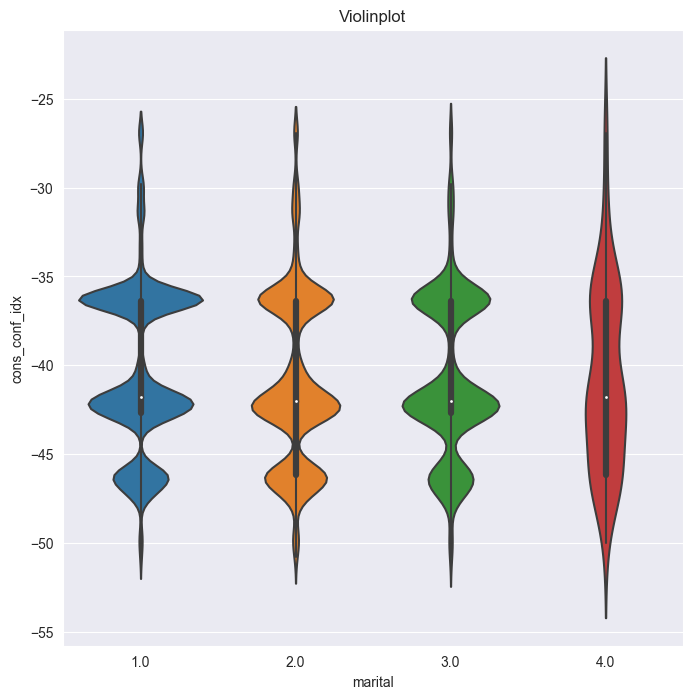

In [32]:
plt.figure(figsize=(8,8))
plt.title('Violinplot')
sns.violinplot(x='marital', y='cons_conf_idx',data=df)

#### 4. Joinplot

The following graph show cases the call duration on each campaign phone call based on individuals of different age groups is proportionate to their interest to know more details about the campaign  to subscribe to a term deposit.

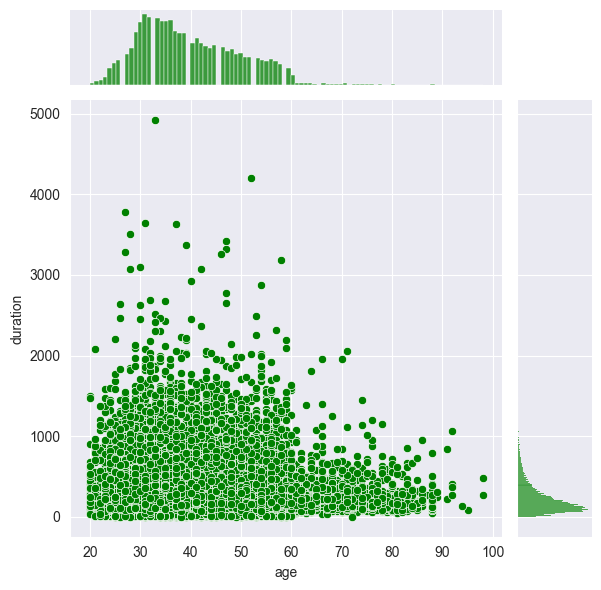

In [33]:
sns.jointplot(x="age", y="duration", data=df, color ='green')

#### 5. Displot

The following graph shows the subsription status of the candidates according to the type of job at a specific age.

JOB: ['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], [1,2,3,4,5,6,7,8,9,10,11,12]

result: It looks like 'admin.', 'blue-collar', 'technician' job type candidates didn't show interest to subscribe and age group 40 to 60 being an entrepreneur, self-employed, retired opted IN

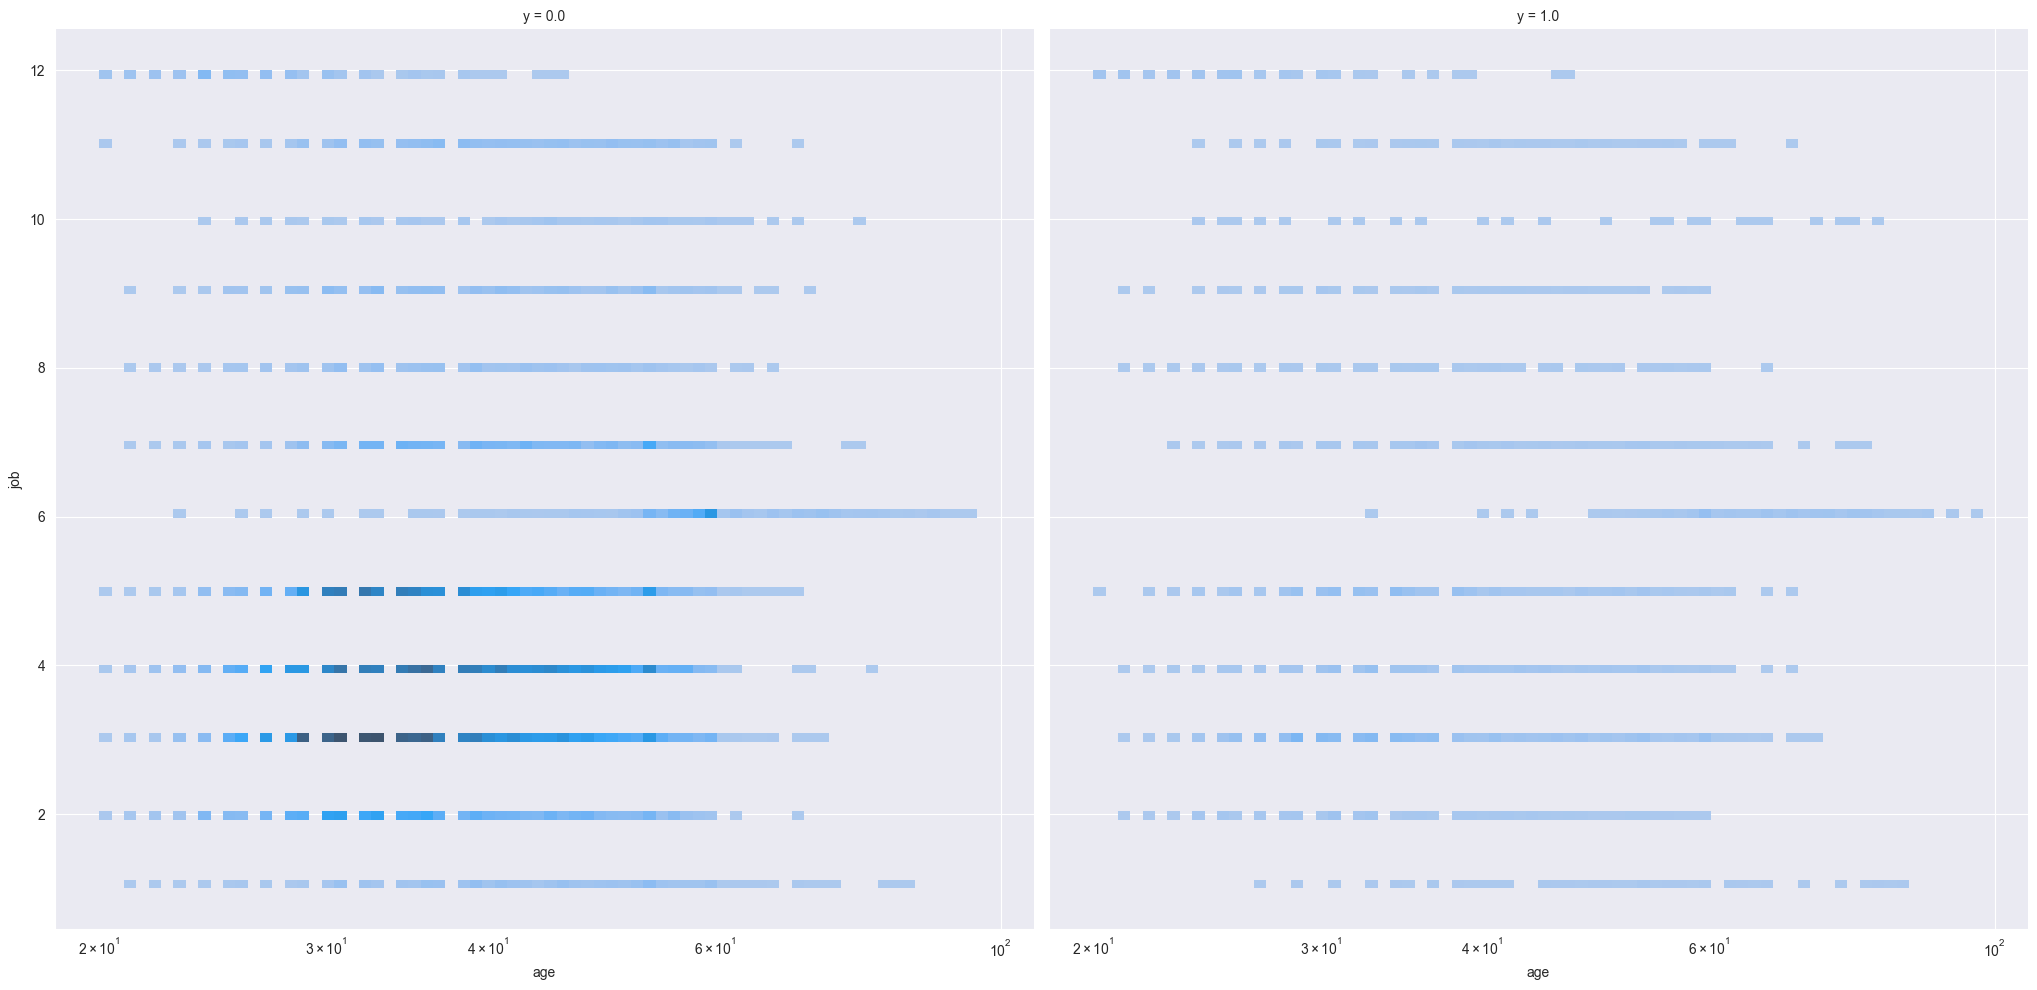

In [34]:
sns.displot(
    data=df, x="age", y="job", col="y",
    log_scale=(True, False), col_wrap=10, height=10, aspect=1,
)

#### 6 HeatMap

Heatmap it is used to correlation between each of the attributes.

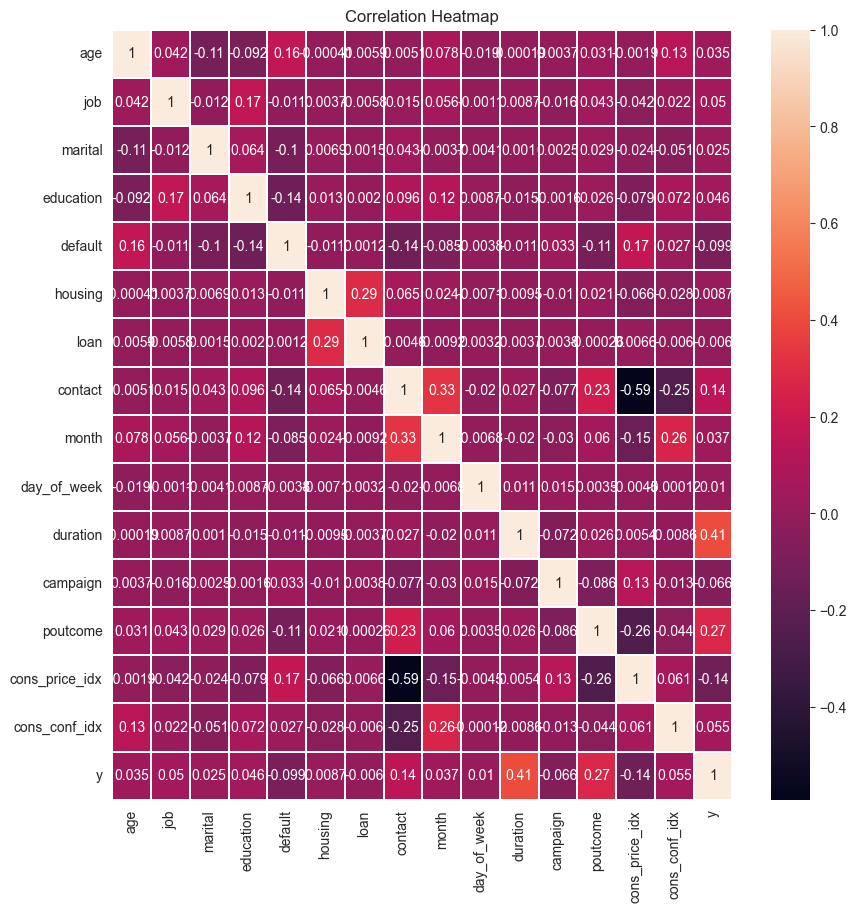

In [35]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True, cmap = 'rocket', linewidth = 0.01)
plt.title("Correlation Heatmap")
plt.show()

#### 7.Subplot

majority of the data collected in the dataset are between age group 20 to 45 working as 'admin.', 'blue-collar', 'technician' or 'retired'

Job Labels:
(['housemaid', 'services', 'admin.', 'blue-collar', 'technician','retired', 'management', 'unemployed', 'self-employed', 'unknown','entrepreneur', 'student'], [1,2,3,4,5,6,7,8,9,10,11,12])

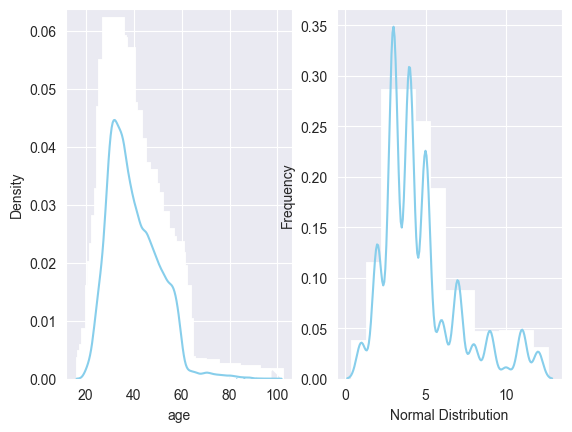

In [36]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
ax = sns.distplot(df['age'],
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

plt.subplot(1, 2, 2) # index 2

ax = sns.distplot(df['job'],
                  bins=12,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})               
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

plt.show()

#### 8.Autocorrelation plot 

In the below graph it is compared between duration, cons_price_idx & y, by this autocorrelation we can see the randomness of the data, where cons_price_idx has the more randomness than duration & y


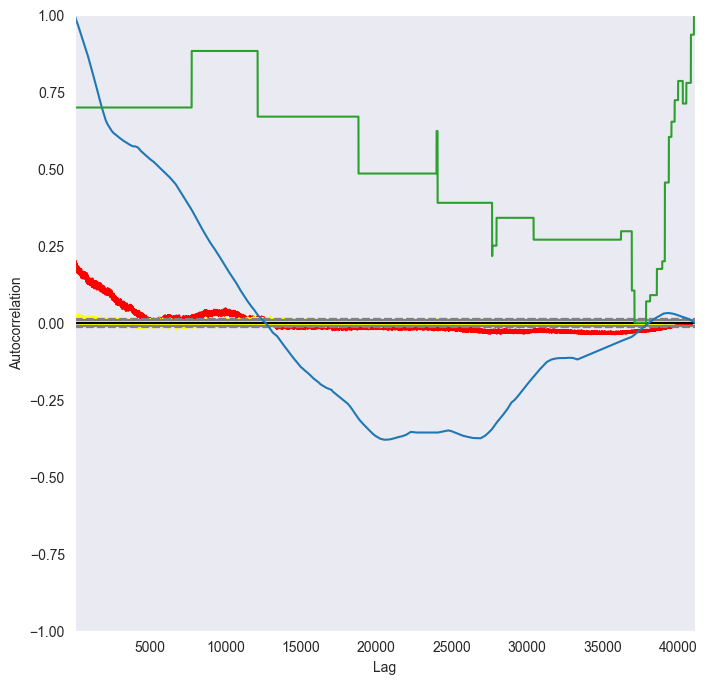

In [37]:
plt.figure(figsize=(8,8))
target_value=df['y']
predict_value=df['duration']
less_correlated_value=df['cons_price_idx']
pd.plotting.autocorrelation_plot(target_value,color='red')
pd.plotting.autocorrelation_plot(predict_value,color='yellow')
pd.plotting.autocorrelation_plot(less_correlated_value)
plt.plot(target_value,predict_value,less_correlated_value)
plt.show()

#### 9. Boxplot

From the below graph we can say that how many number of cutomers took loan in which month

<AxesSubplot:xlabel='loan', ylabel='month'>

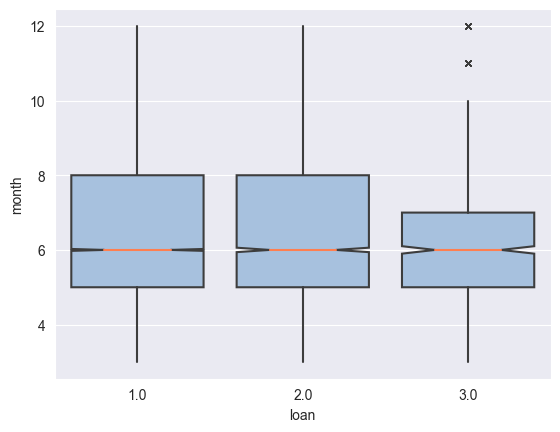

In [38]:
sns.boxplot(
    data=df, x="loan", y="month",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color":"coral"},
)

#### 10. Pivot plot

The pivot plot is shown between the age vs job where we can say what age group of people are having what type of job

<AxesSubplot:xlabel='age'>

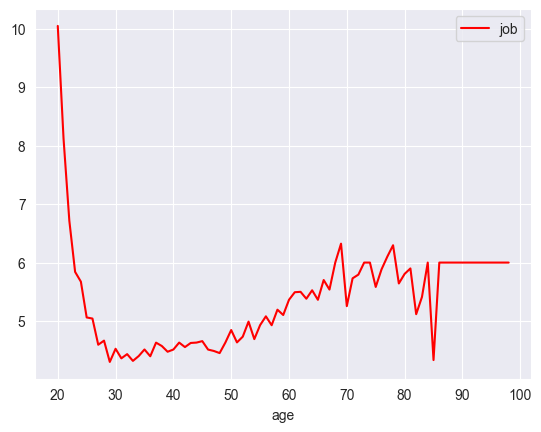

In [39]:
age=pd.pivot_table(df,values='job',index='age')
age.plot(color='red')

## Project Phase 2

In [40]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

Checking precision, recall, accuracy scores on splitting data in the ratio of 80-20 and 70-30

### Splitting the data into train and test to 80-20

In [41]:
X=df.iloc[:,:-1]
y = df.y

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [43]:
standardscalar=StandardScaler()
X_train=standardscalar.fit_transform(X_train)
X_test=standardscalar.fit_transform(X_test)

#### 1. SVM Model

In [44]:
from sklearn import svm

In [45]:
svm_model=svm.SVC(kernel='rbf', C = 10,probability=True)

In [46]:
svm_model.fit(X_train, y_train)

In [ ]:
svm_prediction=svm_model.predict(X_test)
svm_prediction

array([0., 0., 1., ..., 0., 0., 0.])

In [ ]:
print("Accuracy:",(metrics.accuracy_score(y_test, svm_prediction))*100)
print('F1 Score:',(f1_score(y_test,svm_prediction)*100))
print('Precision Score:',(precision_score(y_test,svm_prediction)*100))
print('Recall Score:',(recall_score(y_test,svm_prediction)*100))

Accuracy: 90.48661800486619
F1 Score: 48.21192052980132
Precision Score: 59.67213114754099
Recall Score: 40.44444444444444


Logistic: F1=0.482 Auc=0.547


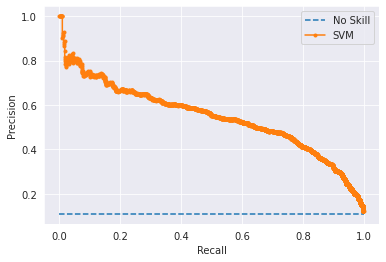

In [ ]:
lr_probs = svm_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = svm_prediction
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: F1=%.3f Auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### 2 Naive Bayes

In [ ]:
from sklearn.naive_bayes import  GaussianNB
naive_bayes=GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [ ]:
Naive_pred=naive_bayes.predict(X_test)

In [ ]:
print("Accuracy:",(metrics.accuracy_score(y_test, Naive_pred))*100)
print('F1 Score:',(f1_score(y_test,Naive_pred)*100))
print('Precision Score:',(precision_score(y_test,Naive_pred)*100))
print('Recall Score:',(recall_score(y_test,Naive_pred)*100))

Accuracy: 85.04866180048661
F1 Score: 44.36396559529198
Precision Score: 37.4331550802139
Recall Score: 54.44444444444444


Logistic: F1=0.444 Auc=0.442


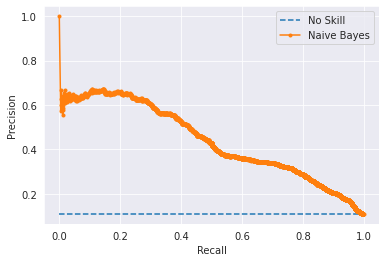

In [ ]:
lr_probs = naive_bayes.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = Naive_pred
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: F1=%.3f Auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Naive Bayes')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### 3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train,y_train)
random_pred=random_forest.predict(X_test)

In [ ]:
print("Accuracy:",(metrics.accuracy_score(y_test, random_pred.round()))*100)
print('F1 Score:',(f1_score(y_test,random_pred.round())*100))
print('Precision Score:',(precision_score(y_test,random_pred.round())*100))
print('Recall Score:',(recall_score(y_test,random_pred.round())*100))

Accuracy: 91.16788321167884
F1 Score: 54.108723135271795
Precision Score: 62.75659824046921
Recall Score: 47.55555555555556


Logistic: F1=0.541 Auc=0.617


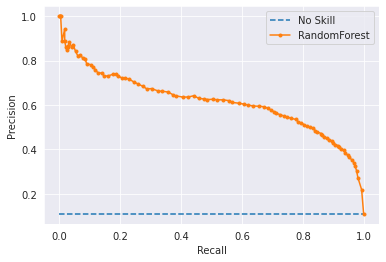

In [ ]:
lr_probs = random_forest.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = random_pred
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: F1=%.3f Auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='RandomForest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### 4 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
logestic_model=LogisticRegression(random_state=16) 

In [ ]:
logestic_model.fit(X_train ,y_train)

LogisticRegression(random_state=16)

In [ ]:
logestic_predict=logestic_model.predict(X_test)

In [ ]:
print("Accuracy:",(metrics.accuracy_score(y_test, logestic_predict))*100)
print('F1 Score:',(f1_score(y_test,logestic_predict)*100))
print('Precision Score:',(precision_score(y_test,logestic_predict)*100))
print('Recall Score:',(recall_score(y_test,logestic_predict)*100))

Accuracy: 90.36496350364963
F1 Score: 40.62968515742129
Precision Score: 62.44239631336406
Recall Score: 30.11111111111111


Logistic: F1=0.406 Auc=0.488


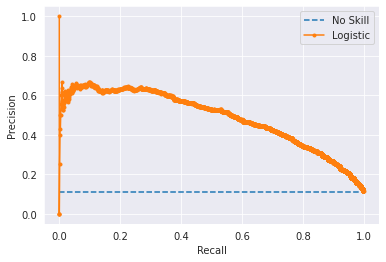

In [ ]:
lr_probs = logestic_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = logestic_predict
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: F1=%.3f Auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### 5 Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


Decision_model = DecisionTreeClassifier(max_depth = 2, criterion = 'entropy')
Decision_model = Decision_model.fit(X_train,y_train)
decision_pred = Decision_model.predict(X_test)

In [ ]:
print("Accuracy:",(metrics.accuracy_score(y_test, decision_pred))*100)
print('F1 Score:',(f1_score(y_test,decision_pred)*100))
print('Precision Score:',(precision_score(y_test,decision_pred)*100))
print('Recall Score:',(recall_score(y_test,decision_pred)*100))

Accuracy: 89.50121654501217
F1 Score: 49.50263311878291
Precision Score: 52.286773794808404
Recall Score: 47.0


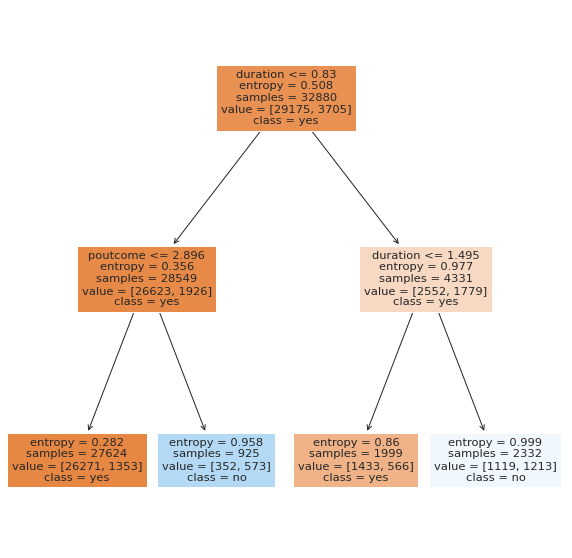

In [ ]:
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'cons_price_idx', 'cons_conf_idx']

classes = ['yes','no']

fig = plt.figure(figsize = (10,10))

plot = tree.plot_tree(Decision_model,
                     feature_names = features,
                     class_names = classes,
                     filled = True)

Logistic: F1=0.495 Auc=0.468


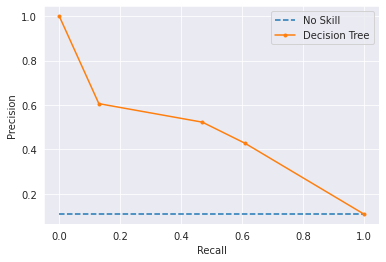

In [ ]:
lr_probs = Decision_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = decision_pred
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: F1=%.3f Auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Splitting the data into train and test to 70-30

In [ ]:
A=df.iloc[:,:-1]
b = df.y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(A, b, test_size = 0.3)

In [ ]:
standardscalar=StandardScaler()
X_train=standardscalar.fit_transform(X_train)
X_test=standardscalar.fit_transform(X_test)

#### 1. SVM model

In [ ]:
from sklearn import svm

In [ ]:
svm_model=svm.SVC(kernel='rbf', C = 10,probability=True)
svm_model.fit(X_train, y_train)
svm_prediction=svm_model.predict(X_test)

In [ ]:
print("Accuracy:",(metrics.accuracy_score(y_test, svm_prediction))*100)
print('F1 Score:',(f1_score(y_test,svm_prediction)*100))
print('Precision Score:',(precision_score(y_test,svm_prediction)*100))
print('Recall Score:',(recall_score(y_test,svm_prediction)*100))

Accuracy: 90.71370640713707
F1 Score: 50.32537960954448
Precision Score: 61.89967982924226
Recall Score: 42.39766081871345


Accuracy: 90.71370640713707
F1 Score: 50.32537960954448


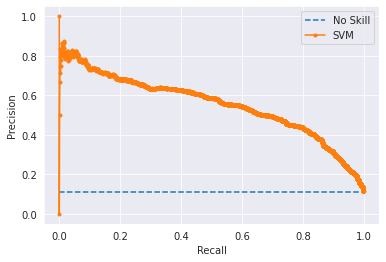

In [ ]:
preds = svm_model.predict_proba(X_test)
preds = preds[:, 1]
yhat = svm_prediction
svm_precision, svm_recall, _ = precision_recall_curve(y_test, preds)
print("Accuracy:",(metrics.accuracy_score(y_test, svm_prediction))*100)
print('F1 Score:',(f1_score(y_test,svm_prediction)*100))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(svm_recall, svm_precision, marker='.', label='SVM')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()

Confusion Matrix 
 [[10605   357]
 [  788   580]]


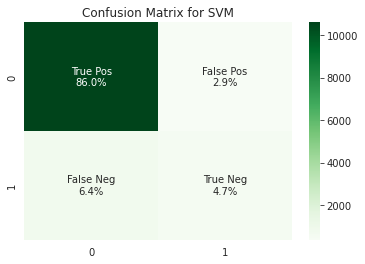

In [ ]:
cf_matrix = confusion_matrix(y_test, svm_prediction)
print('Confusion Matrix \n',cf_matrix)
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_percentages = ['{0:.1%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for SVM')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

#### 2. Naive Bayes

In [ ]:
from sklearn.naive_bayes import  GaussianNB

In [ ]:
naive_bayes=GaussianNB()
naive_bayes.fit(X_train,y_train)
Naive_pred=naive_bayes.predict(X_test)

In [ ]:
print("Accuracy:",(metrics.accuracy_score(y_test, Naive_pred))*100)
print('F1 Score:',(f1_score(y_test,Naive_pred)*100))
print('Precision Score:',(precision_score(y_test,Naive_pred)*100))
print('Recall Score:',(recall_score(y_test,Naive_pred)*100))

Accuracy: 86.41524736415246
F1 Score: 47.770502026816345
Precision Score: 41.65307232191409
Recall Score: 55.99415204678363


Accuracy: 86.41524736415246
F1 Score: 47.770502026816345


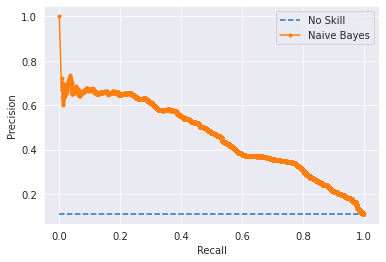

In [ ]:
preds = naive_bayes.predict_proba(X_test)
preds = preds[:, 1]
yhat = Naive_pred
Naive_precision, Naive_recall, _ = precision_recall_curve(y_test, preds)
print("Accuracy:",(metrics.accuracy_score(y_test, Naive_pred))*100)
print('F1 Score:',(f1_score(y_test,Naive_pred)*100))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(Naive_recall, Naive_precision, marker='.', label='Naive Bayes')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()

Confusion Matrix 
 [[9889 1073]
 [ 602  766]]


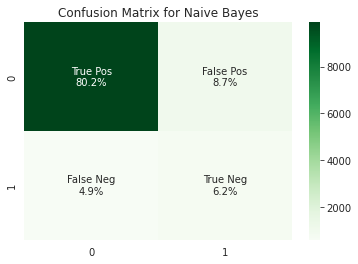

In [ ]:
cf_matrix = confusion_matrix(y_test, Naive_pred)
print('Confusion Matrix \n',cf_matrix)
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_percentages = ['{0:.1%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for Naive Bayes')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

Comparing SVM with naive bayes:

Accuracy:


1.   SVM: 90.8%
2.   Naive: 86.8%


Both are classifiers where Naive bayes is probabilistic in nature wherein SVM is geometric categorising the data points maximising the differences between them. 

Naive assumes feature values are independent on other feature values, however SVM tries to build relations between the features. 

For the dataset that's consider in the project, SVM has a sight more accuracy than Naive base. One of the assumptions is that more than one feature has correlation with the other features which means there is dependency among the feature. This boosts SVM to classify data points more accurately. Naive based works on independent dependencies and features like duration, poutcome, education and contact etc., but these are quite low compared to internal dependencies among the features.

One advantage of Naive Bayes over SVM is training cost. Naive runs in 30 seconds but SVM takes almost 150 seconds running on GPU.

In conclusion, we can say that due to less correlation of featuers on output field and high inter-feature dependencies SVM outperformed Naive bayes.



#### 3. Decision Tree classifier

(From the above two models) Now that we understood the colinearity is more than the correlation on output field and the dataset has categorical data in the features like job, education, marital status and campaign etc, we thought DecisionTrees can be helpful considering their functionality on independent variables, categorial data and multicolinearity. However, SVM outperformed Decision Trees by one percent. This might be because DecisionTrees are sensitive to noises in the data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
Decision_model = DecisionTreeClassifier(max_depth = 2, criterion = 'entropy')
Decision_model = Decision_model.fit(X_train,y_train)
decision_pred = Decision_model.predict(X_test)

In [ ]:
print("Accuracy:",(metrics.accuracy_score(y_test, decision_pred))*100)
print('F1 Score:',(f1_score(y_test,decision_pred)*100))
print('Precision Score:',(precision_score(y_test,decision_pred)*100))
print('Recall Score:',(recall_score(y_test,decision_pred)*100))

Accuracy: 89.46472019464721
F1 Score: 50.134357005758154
Precision Score: 52.78900565885206
Recall Score: 47.73391812865497


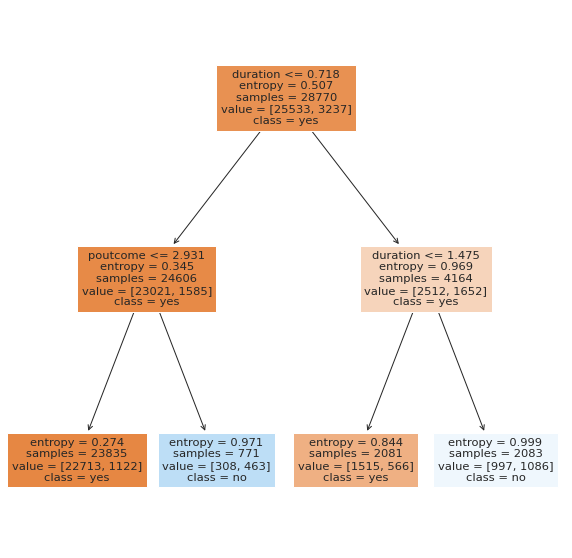

In [ ]:
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'cons_price_idx', 'cons_conf_idx']

classes = ['yes','no']

fig = plt.figure(figsize = (10,10))

plot = tree.plot_tree(Decision_model,
                     feature_names = features,
                     class_names = classes,
                     filled = True)

Accuracy: 89.46472019464721
F1 Score: 50.134357005758154


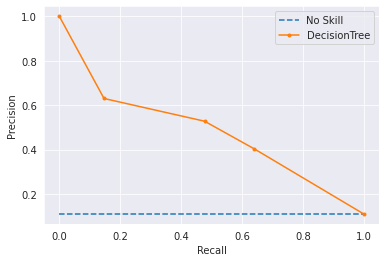

In [ ]:
preds = Decision_model.predict_proba(X_test)
preds = preds[:, 1]
yhat = decision_pred
DT_precision, DT_recall, _ = precision_recall_curve(y_test, preds)
print("Accuracy:",(metrics.accuracy_score(y_test, decision_pred))*100)
print('F1 Score:',(f1_score(y_test,decision_pred)*100))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(DT_recall, DT_precision, marker='.', label='DecisionTree')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()

Confusion Matrix 
 [[10378   584]
 [  715   653]]


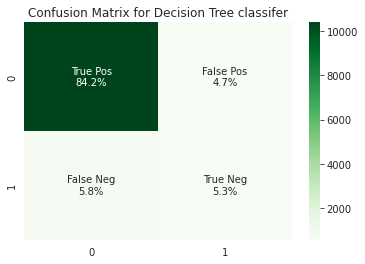

In [ ]:
cf_matrix = confusion_matrix(y_test, decision_pred)
print('Confusion Matrix \n',cf_matrix)
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_percentages = ['{0:.1%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for Decision Tree classifer')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

#### 4. Random Forest

Since decision trees are graphs that illustrates all possible outcomes and are prone to noises. To avoid this we can use random forests which outputs only a set of DecisionTress that work according to the output. We build a model on RandomForest algorithm which gave an accuracy of 2% more than decisiontree.

This is so far highest accuracy we have achieved and unfortunately, we can't visualize RandomForest trees.

Comparing accuracies:

1.   SVM: 90.8%
2.   Naive: 86.8%
3.   Decision tree: 89.76%
4.   RandomForest: 91.34%
5.   logistic Regression: 90.04%

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train,y_train)
random_pred=random_forest.predict(X_test)

In [ ]:
print("Accuracy:",(metrics.accuracy_score(y_test, random_pred.round()))*100)
print('F1 Score:',(f1_score(y_test,random_pred.round())*100))
print('Precision Score:',(precision_score(y_test,random_pred.round())*100))
print('Recall Score:',(recall_score(y_test,random_pred.round())*100))

Accuracy: 91.20843471208435
F1 Score: 54.72013366750209
Precision Score: 63.840155945419106
Recall Score: 47.88011695906433


Accuracy: 91.20843471208435
F1 Score: 54.72013366750209


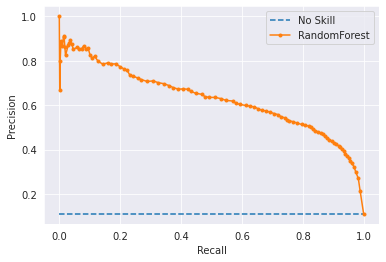

In [ ]:
preds = random_forest.predict_proba(X_test)
preds = preds[:, 1]
yhat = random_pred
RF_precision, RF_recall, _ = precision_recall_curve(y_test, preds)
print("Accuracy:",(metrics.accuracy_score(y_test, random_pred))*100)
print('F1 Score:',(f1_score(y_test,random_pred)*100))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(RF_recall, RF_precision, marker='.', label='RandomForest')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()

Confusion Matrix 
 [[10591   371]
 [  713   655]]


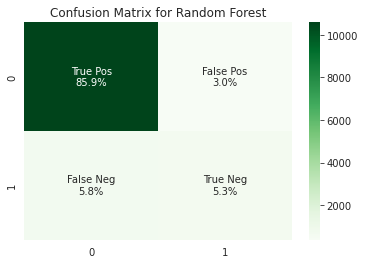

In [ ]:
cf_matrix = confusion_matrix(y_test, random_pred)
print('Confusion Matrix \n',cf_matrix)
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_percentages = ['{0:.1%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for Random Forest')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

#### 5. Logistic Regression

Logistic regression is a classification model which is dedicated to binomial data predicting binary classes. This computes probability of occurance of an event using logarithemic computations which gave an accuracy of 90.54%.

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
logestic_model=LogisticRegression(random_state=16) 
logestic_model.fit(X_train ,y_train)
logestic_predict=logestic_model.predict(X_test)

In [ ]:
print("Accuracy:",(metrics.accuracy_score(y_test, logestic_predict))*100)
print('F1 Score:',(f1_score(y_test,logestic_predict)*100))
print('Precision Score:',(precision_score(y_test,logestic_predict)*100))
print('Recall Score:',(recall_score(y_test,logestic_predict)*100))

Accuracy: 90.04055150040551
F1 Score: 39.14767096134786
Precision Score: 60.76923076923077
Recall Score: 28.874269005847953


Accuracy: 90.04055150040551
F1 Score: 39.14767096134786


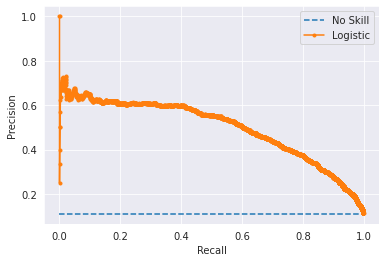

In [ ]:
preds = logestic_model.predict_proba(X_test)
preds = preds[:, 1]
yhat = logestic_predict
L_precision, L_recall, _ = precision_recall_curve(y_test, preds)
print("Accuracy:",(metrics.accuracy_score(y_test, logestic_predict))*100)
print('F1 Score:',(f1_score(y_test,logestic_predict)*100))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(L_recall, L_precision, marker='.', label='Logistic')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()

Confusion Matrix 
 [[10707   255]
 [  973   395]]


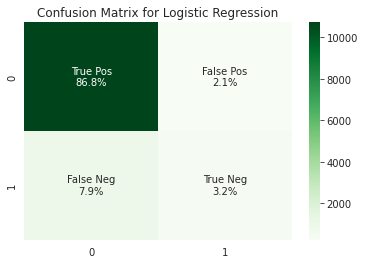

In [ ]:
cf_matrix = confusion_matrix(y_test, logestic_predict)
print('Confusion Matrix \n',cf_matrix)
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_percentages = ['{0:.1%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for Logistic Regression')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

Precision vs Recall graphs:

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

In the below graph we can clearly see that precision and recall scores are equally high for RandomForest among all. Which leads to more accuracy since predicted true postive and true negatives are high.

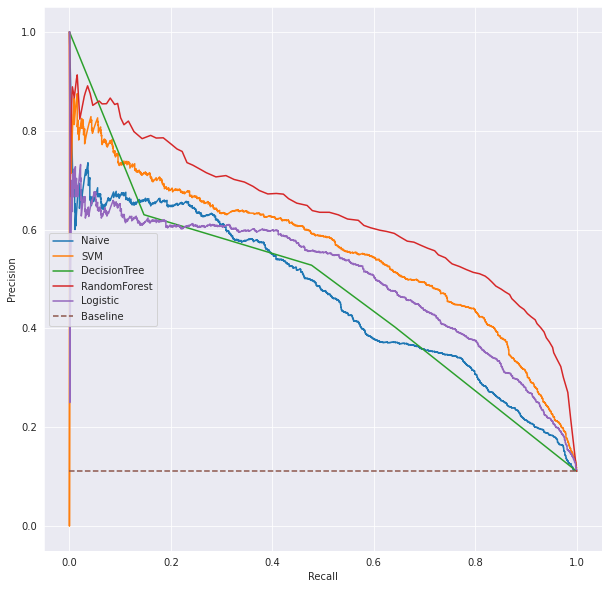

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot( Naive_recall, Naive_precision, label='Naive')
ax.plot(svm_recall, svm_precision, label='SVM')
ax.plot(DT_recall, DT_precision, label='DecisionTree')
ax.plot(RF_recall, RF_precision, label='RandomForest')
ax.plot(L_recall,L_precision, label='Logistic')
baseline = len(y_test[y_test==1]) / len(y_test)
ax.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='center left');

**Additional Model:** Kmeans

We classified the data into two and using the elbow technique we understood that number of cluster = 2 is ideal which is correct since we have binominal data. 

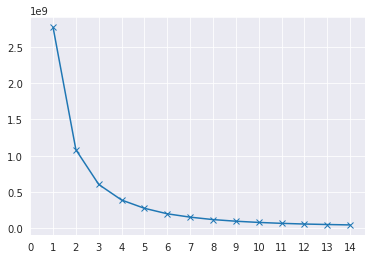

In [ ]:
from sklearn.cluster import KMeans
inertia = []

K = range(1,15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(X)
    inertia.append(km.inertia_)
plt.plot(K,inertia,marker = "x")
plt.xticks(np.arange(15))
plt.show()

In [ ]:
km = KMeans(n_clusters = 2, n_init = 3, init = 'random', random_state = 42)

km.fit(X)

y_meanss = km.predict(X)
print(y_meanss.size)

41100


In [ ]:
labels = km.labels_
true_pred = sum(y == labels)
print(format(true_pred/(y.size)))


0.8671532846715329


### Performing balancing:
We can clearly observe that the records with 'NO' label ratio is really high compared to 'Yes' labled records. Hence we need to balance data in such a way that our data has equal number of records with 'Yes' and 'No' labels.

We'll observe precesion score and recall as well as confusion matrix in the following cells on the balanced data.

Earlier, there are 36495 record with 'No' and 4605 records with 'Yes'. After balancing we have equal distribution. 4605 records in each. 

**checking data on resultant field**

In [ ]:
df['y'].value_counts()

0.0    36495
1.0     4605
Name: y, dtype: int64

In [ ]:
datano = df[df.y == 0]
datayes = df[df.y == 1]
balanced_df = pd.concat([datano.sample(len(datayes), random_state=5), datayes])
print("Balanced data shape:", len(balanced_df))

Balanced data shape: 9210


In [ ]:
balanced_df['y'].value_counts()

0.0    4605
1.0    4605
Name: y, dtype: int64

In [ ]:
X1 = balanced_df.iloc[:,:-1]
X1
x1 = balanced_df.iloc[:,balanced_df.columns != 'y']

Y1 = balanced_df.y
# X = X[1:]
print(x1)
print(Y1)
print(len(X1),len(Y1))


        age  job  marital  education  default  housing  loan  contact  month  \
33255  38.0  4.0      1.0        4.0      2.0      1.0   1.0      2.0    5.0   
7228   57.0  9.0      2.0        2.0      3.0      1.0   1.0      1.0    5.0   
15127  35.0  4.0      1.0        4.0      2.0      2.0   1.0      2.0    7.0   
34545  27.0  3.0      1.0        5.0      2.0      1.0   1.0      2.0    5.0   
31372  38.0  4.0      1.0        2.0      3.0      2.0   1.0      2.0    5.0   
...     ...  ...      ...        ...      ...      ...   ...      ...    ...   
41174  62.0  6.0      1.0        7.0      2.0      2.0   1.0      2.0   11.0   
41178  62.0  6.0      1.0        7.0      2.0      1.0   1.0      2.0   11.0   
41181  37.0  3.0      1.0        7.0      2.0      2.0   1.0      2.0   11.0   
41183  73.0  6.0      1.0        5.0      2.0      2.0   1.0      2.0   11.0   
41186  44.0  5.0      1.0        5.0      2.0      1.0   1.0      2.0   11.0   

       day_of_week  duration  campaign 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.3)

In [ ]:
standardscalar=StandardScaler()
X_train=standardscalar.fit_transform(X_train)
X_test=standardscalar.fit_transform(X_test)

#### 1. SVM model

In [ ]:
from sklearn import svm

In [ ]:
svm_model=svm.SVC(kernel='rbf', C = 10,probability=True)
svm_model.fit(X_train, y_train)
svm_prediction=svm_model.predict(X_test)

In [ ]:
print("Accuracy:",(metrics.accuracy_score(y_test, svm_prediction))*100)
print('F1 Score:',(f1_score(y_test,svm_prediction)*100))
print('Precision Score:',(precision_score(y_test,svm_prediction)*100))
print('Recall Score:',(recall_score(y_test,svm_prediction)*100))

Accuracy: 85.05247918928701
F1 Score: 85.55438964672962
Precision Score: 85.10786360473207
Recall Score: 86.0056258790436


Accuracy: 85.05247918928701
F1 Score: 85.55438964672962


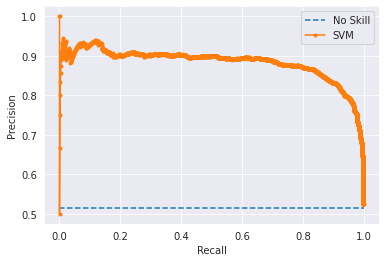

In [ ]:
preds = svm_model.predict_proba(X_test)
preds = preds[:, 1]
yhat = svm_prediction
svm_precision, svm_recall, _ = precision_recall_curve(y_test, preds)
print("Accuracy:",(metrics.accuracy_score(y_test, svm_prediction))*100)
print('F1 Score:',(f1_score(y_test,svm_prediction)*100))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(svm_recall, svm_precision, marker='.', label='SVM')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()

Confusion Matrix 
 [[1127  214]
 [ 199 1223]]


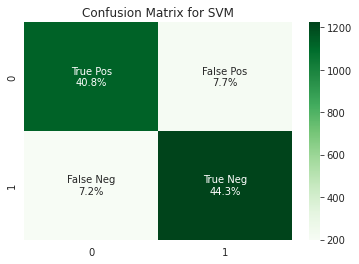

In [ ]:
cf_matrix = confusion_matrix(y_test, svm_prediction)
print('Confusion Matrix \n',cf_matrix)
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_percentages = ['{0:.1%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for SVM')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

#### 2. Naive Bayes

In [ ]:
from sklearn.naive_bayes import  GaussianNB

In [ ]:
naive_bayes=GaussianNB()
naive_bayes.fit(X_train,y_train)
Naive_pred=naive_bayes.predict(X_test)

In [ ]:
print("Accuracy:",(metrics.accuracy_score(y_test, Naive_pred))*100)
print('F1 Score:',(f1_score(y_test,Naive_pred)*100))
print('Precision Score:',(precision_score(y_test,Naive_pred)*100))
print('Recall Score:',(recall_score(y_test,Naive_pred)*100))

Accuracy: 77.34346724574738
F1 Score: 76.8319763138416
Precision Score: 81.09375
Recall Score: 72.9957805907173


Accuracy: 77.34346724574738
F1 Score: 76.8319763138416


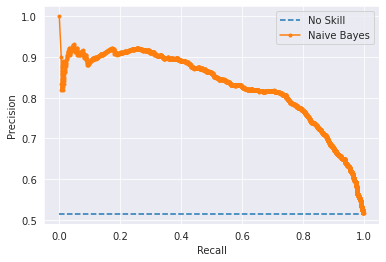

In [ ]:
preds = naive_bayes.predict_proba(X_test)
preds = preds[:, 1]
yhat = Naive_pred
Naive_precision, Naive_recall, _ = precision_recall_curve(y_test, preds)
print("Accuracy:",(metrics.accuracy_score(y_test, Naive_pred))*100)
print('F1 Score:',(f1_score(y_test,Naive_pred)*100))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(Naive_recall, Naive_precision, marker='.', label='Naive Bayes')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()

Confusion Matrix 
 [[1099  242]
 [ 384 1038]]


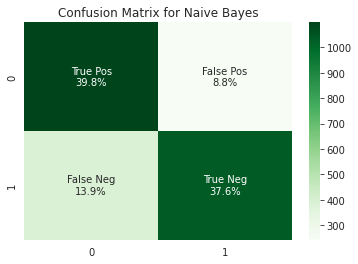

In [ ]:
cf_matrix = confusion_matrix(y_test, Naive_pred)
print('Confusion Matrix \n',cf_matrix)
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_percentages = ['{0:.1%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for Naive Bayes')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

Comparing SVM with naive bayes:

Accuracy:


1.   SVM: 85.05%
2.   Naive: 77.34%


Both are classifiers where Naive bayes is probabilistic in nature wherein SVM is geometric categorising the data points maximising the differences between them. 

Naive assumes feature values are independent on other feature values, however SVM tries to build relations between the features. 

For the dataset that's consider in the project, SVM has a sight more accuracy than Naive base. One of the assumptions is that more than one feature has correlation with the other features which means there is dependency among the feature. This boosts SVM to classify data points more accurately. Naive based works on independent dependencies and features like duration, poutcome, education and contact etc., but these are quite low compared to internal dependencies among the features.

One advantage of Naive Bayes over SVM is training cost. Naive runs in 30 seconds but SVM takes almost 150 seconds running on GPU.

In conclusion, we can say that due to less correlation of featuers on output field and high inter-feature dependencies SVM outperformed Naive bayes.



#### 3. Decision Tree classifier

(From the above two models) Now that we understood the colinearity is more than the correlation on output field and the dataset has categorical data in the features like job, education, marital status and campaign etc, we thought DecisionTrees can be helpful considering their functionality on independent variables, categorial data and multicolinearity. However, SVM outperformed Decision Trees by TEN percent. This might be because DecisionTrees are sensitive to noises in the data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
Decision_model = DecisionTreeClassifier(max_depth = 2, criterion = 'entropy')
Decision_model = Decision_model.fit(X_train,y_train)
decision_pred = Decision_model.predict(X_test)

In [ ]:
print("Accuracy:",(metrics.accuracy_score(y_test, decision_pred))*100)
print('F1 Score:',(f1_score(y_test,decision_pred)*100))
print('Precision Score:',(precision_score(y_test,decision_pred)*100))
print('Recall Score:',(recall_score(y_test,decision_pred)*100))

Accuracy: 75.6786102062975
F1 Score: 79.36117936117935
Precision Score: 70.44711014176663
Recall Score: 90.85794655414908


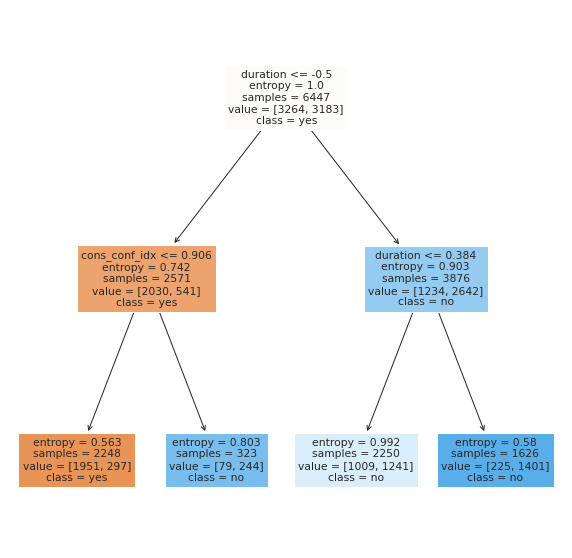

In [ ]:
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'cons_price_idx', 'cons_conf_idx']

classes = ['yes','no']

fig = plt.figure(figsize = (10,10))

plot = tree.plot_tree(Decision_model,
                     feature_names = features,
                     class_names = classes,
                     filled = True)

Accuracy: 75.6786102062975
F1 Score: 79.36117936117935


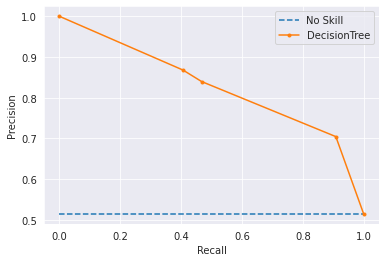

In [ ]:
preds = Decision_model.predict_proba(X_test)
preds = preds[:, 1]
yhat = decision_pred
DT_precision, DT_recall, _ = precision_recall_curve(y_test, preds)
print("Accuracy:",(metrics.accuracy_score(y_test, decision_pred))*100)
print('F1 Score:',(f1_score(y_test,decision_pred)*100))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(DT_recall, DT_precision, marker='.', label='DecisionTree')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()

Confusion Matrix 
 [[ 799  542]
 [ 130 1292]]


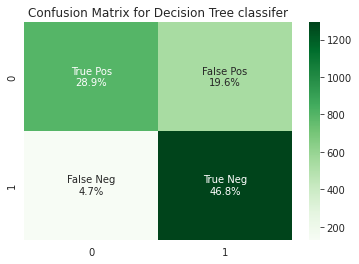

In [ ]:
cf_matrix = confusion_matrix(y_test, decision_pred)
print('Confusion Matrix \n',cf_matrix)
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_percentages = ['{0:.1%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for Decision Tree classifer')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

#### 4. Random Forest

Since decision trees are graphs that illustrates all possible outcomes and are prone to noises. To avoid this we can use random forests which outputs only a set of DecisionTress that work according to the output. We build a model on RandomForest algorithm which gave an accuracy of 2% more than decisiontree.

This is so far highest accuracy we have achieved and unfortunately, we can't visualize RandomForest trees.

Comparing accuracies:

1.   SVM: 85.05%
2.   Naive: 77.34%
3.   Decision tree: 75.67%
4.   RandomForest: 87.54% ♠
5.   logistic Regression: 80.16%

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train,y_train)
random_pred=random_forest.predict(X_test)

In [ ]:
print("Accuracy:",(metrics.accuracy_score(y_test, random_pred.round()))*100)
print('F1 Score:',(f1_score(y_test,random_pred.round())*100))
print('Precision Score:',(precision_score(y_test,random_pred.round())*100))
print('Recall Score:',(recall_score(y_test,random_pred.round())*100))

Accuracy: 87.54976474846181
F1 Score: 88.18681318681318
Precision Score: 86.1744966442953
Recall Score: 90.29535864978902


Accuracy: 87.54976474846181
F1 Score: 88.18681318681318


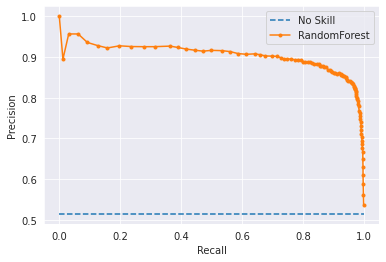

In [ ]:
preds = random_forest.predict_proba(X_test)
preds = preds[:, 1]
yhat = random_pred
RF_precision, RF_recall, _ = precision_recall_curve(y_test, preds)
print("Accuracy:",(metrics.accuracy_score(y_test, random_pred))*100)
print('F1 Score:',(f1_score(y_test,random_pred)*100))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(RF_recall, RF_precision, marker='.', label='RandomForest')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()

Confusion Matrix 
 [[1135  206]
 [ 138 1284]]


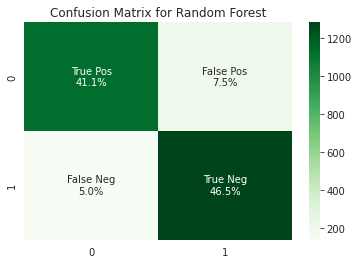

In [ ]:
cf_matrix = confusion_matrix(y_test, random_pred)
print('Confusion Matrix \n',cf_matrix)
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_percentages = ['{0:.1%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for Random Forest')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

#### 5. Logistic Regression

Logistic regression is a classification model which is dedicated to binomial data predicting binary classes. This computes probability of occurance of an event using logarithemic computations which gave an accuracy of 90.54%.

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
logestic_model=LogisticRegression(random_state=16) 
logestic_model.fit(X_train ,y_train)
logestic_predict=logestic_model.predict(X_test)

In [ ]:
print("Accuracy:",(metrics.accuracy_score(y_test, logestic_predict))*100)
print('F1 Score:',(f1_score(y_test,logestic_predict)*100))
print('Precision Score:',(precision_score(y_test,logestic_predict)*100))
print('Recall Score:',(recall_score(y_test,logestic_predict)*100))

Accuracy: 80.16648570394499
F1 Score: 79.91202346041055
Precision Score: 83.46094946401224
Recall Score: 76.65260196905767


Accuracy: 80.16648570394499
F1 Score: 79.91202346041055


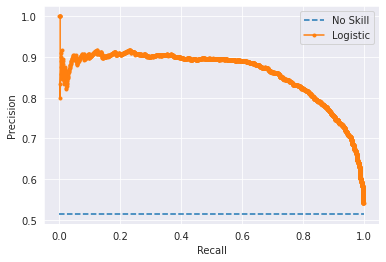

In [ ]:
preds = logestic_model.predict_proba(X_test)
preds = preds[:, 1]
yhat = logestic_predict
L_precision, L_recall, _ = precision_recall_curve(y_test, preds)
print("Accuracy:",(metrics.accuracy_score(y_test, logestic_predict))*100)
print('F1 Score:',(f1_score(y_test,logestic_predict)*100))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(L_recall, L_precision, marker='.', label='Logistic')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()

Confusion Matrix 
 [[1125  216]
 [ 332 1090]]


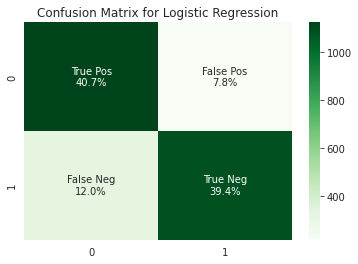

In [ ]:
cf_matrix = confusion_matrix(y_test, logestic_predict)
print('Confusion Matrix \n',cf_matrix)
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_percentages = ['{0:.1%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.title('Confusion Matrix for Logistic Regression')
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')

Precision vs Recall graphs:

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

In the below graph we can clearly see that precision and recall scores are equally high for RandomForest among all. Which leads to more accuracy since predicted true postive and true negatives are high.

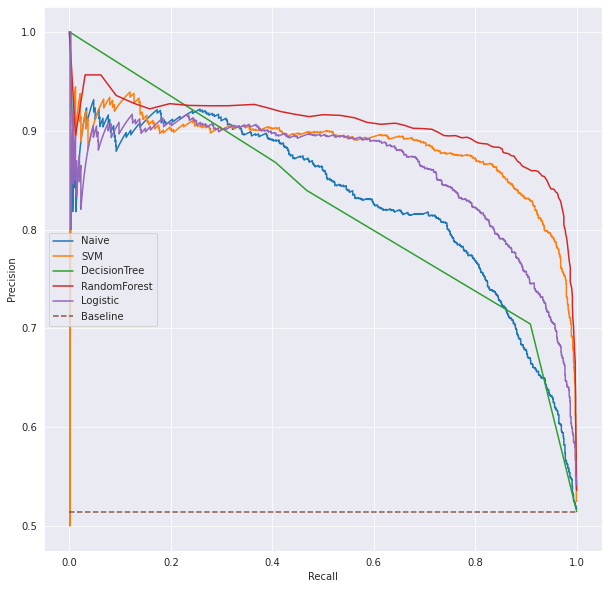

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot( Naive_recall, Naive_precision, label='Naive')
ax.plot(svm_recall, svm_precision, label='SVM')
ax.plot(DT_recall, DT_precision, label='DecisionTree')
ax.plot(RF_recall, RF_precision, label='RandomForest')
ax.plot(L_recall,L_precision, label='Logistic')
baseline = len(y_test[y_test==1]) / len(y_test)
ax.plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='center left');

references:

kmeans: https://realpython.com/k-means-clustering-python/
decisiontrees: http://scikit-learn.org/stable/modules/tree.html
precision and recall: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

SVM: https://www.kaggle.com/code/prashant111/svm-classifier-tutorial/notebook

Naive: https://ieeexplore.ieee.org/abstract/document/5360338?casa_token=yfdCz2kU1j0AAAAA:xY32jlPmP7jBsiZeHem25F9r8GBz5UjW0VOaVoRQA3iA9yw0Y617LlqCMOHfcLqG34lp8ESDJQ

RandomForest: https://www.tandfonline.com/doi/full/10.1080/21642583.2014.956265
